# PCA

In [1]:
from mnist import load_mnist

In [2]:
train, validation, test = load_mnist()

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la

### Вывод парочки картинок

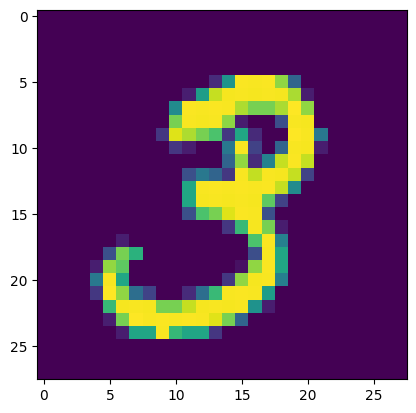

In [4]:
plt.imshow(train[0][1])

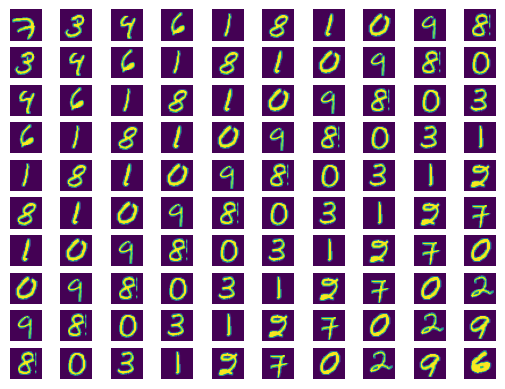

In [5]:
N = 10
numbers = []
numbers = [train[0][i]for i in range(N*N)]


fig, ax = plt.subplots(N,N)
for i in range(N):
    for j in range(N):
        ax[i][j].imshow(numbers[i+j])
        ax[i][j].axis("off")
#ax = [ for i in range(N)] for j in range(N)]


In [357]:
X = train[0]
X = np.array([a.flatten() for a in X])
X.shape

(55000, 784)

In [174]:
train[1]

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
import pandas as pd

In [42]:
df = pd.DataFrame(X)

In [51]:
X[:, 28:784:28]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [41]:
df[ 200:300]

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Реализация Класса

In [7]:
def center(X):
    centered= np.mean(X, axis=0)
    return X - centered

In [160]:
class my_PCA():
    def __init__(self, n_components=None):
        self.n_components = n_components
    def fit(self, X):
        Xc = self.Xc = center(X)
        matritsa_koviratsii = Xc.T.dot(Xc)
               # Вычисление собственных значений и векторов
        eigval, eigvec = np.linalg.eigh(matritsa_koviratsii)

        # Сортировка собственных значений в порядке убывания
        sorted_indices = np.argsort(eigval)[::-1]
        sorted_eigenvalues = eigval[sorted_indices]
        sorted_eigenvectors = eigvec[:, sorted_indices]

        self.evals = sorted_eigenvalues
        self.evecs = sorted_eigenvectors
        
        #self.evals = eigvals
        #self.evecs = eigvecs[:n_components]
    def transform(self, X):
        Xc = X - np.mean(X, axis=0)
        return np.dot(Xc, self.evecs[:, :self.n_components])
    def fit_transform(self, X):        
        self.fit(X)
        return self.transform(X)

## График `scatter` главных копонент своей реализации 

In [161]:
kek = my_PCA(n_components=100)
X_new = kek.fit_transform(X)


In [162]:
X_new.shape

(55000, 100)

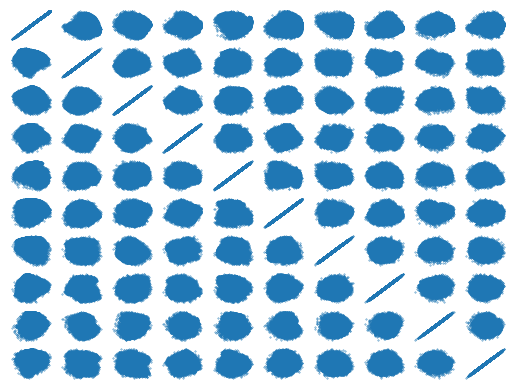

In [163]:
N = 10
start = 0
fig, ax = plt.subplots(N,N)
for i in range(start, N+start):
    for j in range(start, N+start):
        ax[i-start][j-start].scatter(X_new[:, i], X_new[:, j], s = 0.1)
        ax[i-start][j-start].axis("off")
        #ax[i-12][j-12].set_title(f"{i}{j}")
#ax = [ for i in range(N)] for j in range(N)]

## График `scatter` главных копонент sklearn

In [155]:
P = PCA(n_components=10)
wtf = P.fit_transform(center(X))

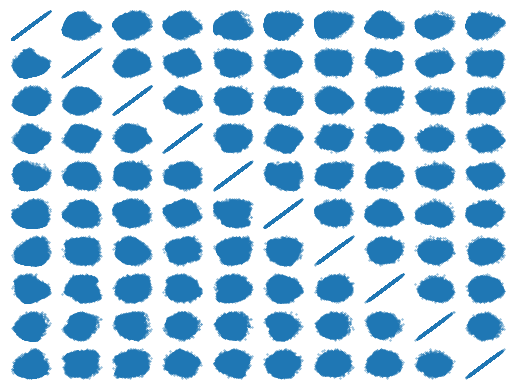

In [145]:
N = 10 
start = 0
fig, ax = plt.subplots(N,N)
for i in range(start, N+start):
    for j in range(start, N+start):
        ax[i-start][j-start].scatter(wtf[:, i], wtf[:, j], s = 0.1)
        ax[i-start][j-start].axis("off")


## Сравнение sklearn и своей реализации

**Свой класс**

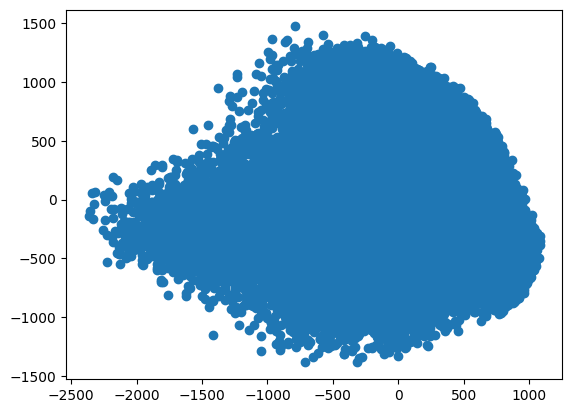

In [166]:
plt.scatter(X_new[:, 0], X_new[:, 1])

**sklearn**

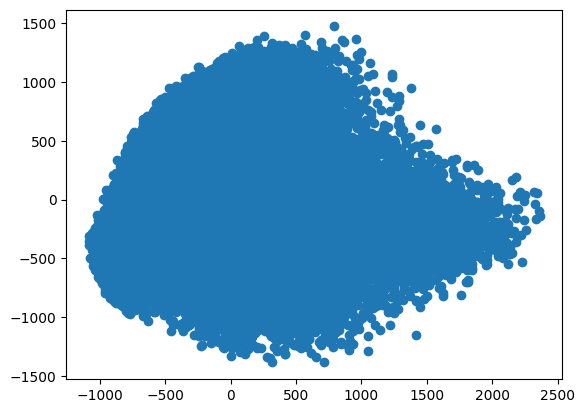

In [168]:
plt.scatter(wtf[:, 0], wtf[:, 1])

Как видим графики просто зеркальны. Видимо мы где-то забыли минус.

Либо минус лишний в sklearn :)

# KNN

## Реализация класса

In [376]:
def find_all_distances(X, y):
    return la.norm((X - y)**2.0, axis=0)

In [379]:
class my_kNN():
    def __init__(self, n_neighbors=5, answers=None):
        self.n_neighbors=n_neighbors
        self.answers = answers
    def fit(self, X, y):
        self.data = X

        distances = find_all_distances(X, y)
        sorted_indices = np.argsort(distances)[::-1][:self.n_neighbors]
        self.sorted_indices = sorted_indices
    def predict(self, X):
        
        neighbours = self.answers[self.sorted_indices]
        counts = np.bincount(neighbours)
        return np.argmax(counts)

In [356]:
def flattern_image(image):
    return np.reshape(image, -1)

def repair_image(image, N):
    return np.reshape(image, (-1, N))

## Проверка предсказаний и построение графика

In [361]:
def checker(neighbours, test_count=20):
    check_count = test_count
    neighbour_count = neighbours
    images = np.array([flattern_image(test[0][i]) for i in range(check_count)])
    answers = []
    for i in range(check_count):
        knn = my_kNN(n_neighbors=neighbour_count ,answers=train[1])
        knn.fit(X, images[i])
        answer = knn.predict(X)
        answers.append(answer)
    equality = (np.array(answers) == test[1][:check_count])
    percent = equality.sum()/equality.shape[0] * 100
    print(f"{percent}% of correct predictions")
    return percent

## Зависимость качества предсказания от количества соседей (на выборке из 20 картинок)

In [362]:
Xl = list(range(3,11))
Y = []
for n in Xl:
    Y.append(checker(n))


25.0% of correct predictions
10.0% of correct predictions
15.0% of correct predictions
15.0% of correct predictions
5.0% of correct predictions
10.0% of correct predictions
10.0% of correct predictions
5.0% of correct predictions


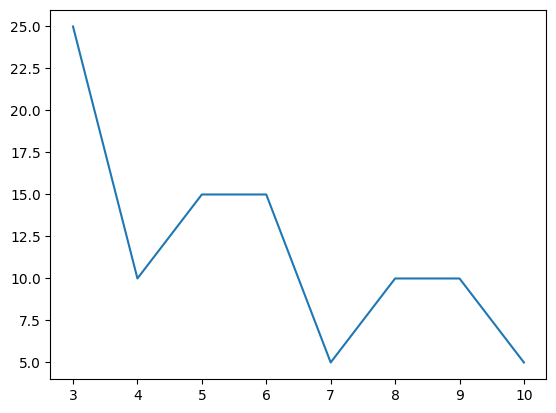

In [364]:
plt.plot(Xl, Y)

##### Зависимость качества предсказания от количества соседей (на выборке из 20 картинок)

In [381]:
Xl = list(range(3,11))
Y = []
for n in Xl:
    Y.append(checker(n, test_count=50))


12.0% of correct predictions
10.0% of correct predictions
10.0% of correct predictions
10.0% of correct predictions
14.000000000000002% of correct predictions
14.000000000000002% of correct predictions
12.0% of correct predictions
12.0% of correct predictions


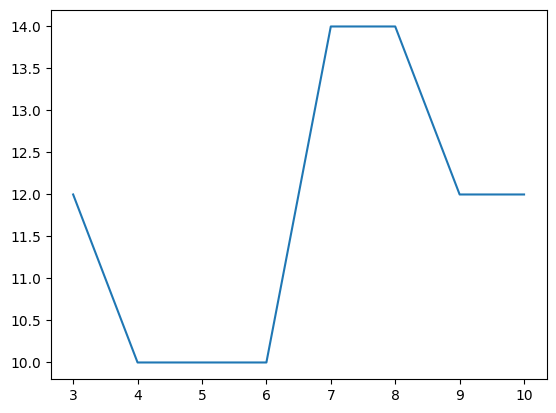

In [382]:
plt.plot(Xl, Y)